In [52]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage

In [53]:
exp1 = np.fromfile('D://osc.dat',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('D://m.dat',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

In [54]:
exp4 = np.reshape(exp4, (-1, 3))
exp4=np.transpose(exp4)

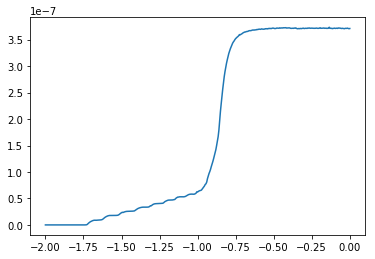

In [55]:
#print exp4
plt.plot(exp4[0],exp4[1])

In [56]:
exp1 = np.fromfile('D://osc.dat',dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (251, 1001))
exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
expp1=exp1
exp2 = np.reshape(exp2, (161, 201))
exp3=exp1

In [57]:
for i in range(251):
    exp3[i] = exp1[i]

In [58]:
for i in range(251):
    dat=baseline_als(exp1[i],10000,0.0001,100)
    exp1[i]=exp1[i]-dat

In [59]:
x=np.linspace(-2., -0.8, num=251)
x2=np.linspace(-2, 0, num=1001)
x3=np.linspace(-2, 0, num=1001)

ValueError: x and y must have same first dimension, but have shapes (1001,) and (251,)

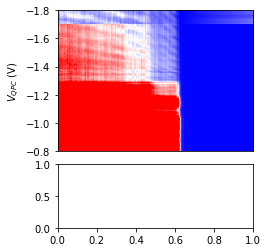

In [60]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
gs.update(left=0, right=0.7, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(gs[0:2, 0:2])
xt=np.linspace(-2.0, -0.0, num=4)
plt.imshow(exp1, interpolation='none', aspect='auto',cmap='bwr', vmax=1E-9, extent=
           [-2.0,0,-.800,-2.000])
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
#plt.colorbar(label='Conductance ($a.u.$)')
plt.ylabel("$V_{QPC}$ (V)")
plt.xticks(np.arange(xt.min(), xt.max(),0.200))
plt.ylim(-0.8,-1.8)
plt.xlim(-0.8,-2)
#plt.title('Concave lense at 1st plateau') 
ax2 = plt.subplot(gs[2,0:2])

plt.plot(x2,exp1[70]*1E9, 'ko')
plt.plot(x2,exp1[90]*1E9, 'b')
plt.plot(x2,exp1[110]*1E9, 'r')
plt.xlim(-0.8,-2)
plt.xticks(np.arange(xt.min(), xt.max(),0.200))

plt.xlabel("$V_{L}$ (V)")
plt.ylabel("$I$ (nA)")
#plt.xlim(0,550)
plt.ylim(0,0.2)
yt=np.linspace(0, 0.2, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.2))
ax3 = plt.subplot(gs[0:2:, 2])


plt.plot(exp4[1],exp4[0],'r')
plt.tick_params(labeltop=False, labelbottom=True, bottom=False, top=False, labelleft=True)
#yt=np.linspace(0, 0.5, num=4)
#plt.xticks(np.arange(yt.min(), yt.max(),0.1))
plt.xlabel("$V_L$ (V)")
plt.xlabel("$I$ (nA)")-2
plt.ylim(-0.8,-1.8)
plt.xlim(-0.1E-7,0.7E-7)


#plt.savefig('D:\\1.pdf', format='pdf')

In [ ]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [ ]:
#expp1=exp1[50:251,0:580]
exp1.shape

In [ ]:

#print expp1.shape
for i in range(201): 
    for j in range(580): 
        exp1[i,j]=exp1[49+i,j]
plt.imshow(expp1)


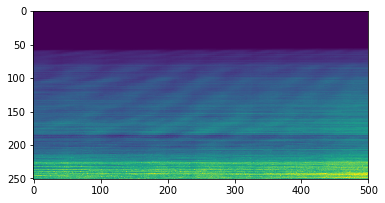

In [62]:
exp1 = np.fromfile('D://osc.dat',dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (251, 1001))
#exp1=np.transpose(exp1)
exp1=exp1[:,0:500]
plt.imshow(exp1)

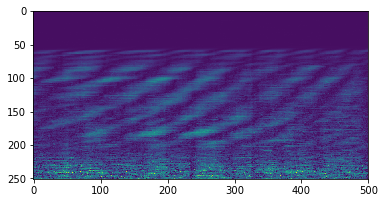

In [63]:
for i in range(251):
    dat=baseline_als(exp1[i,:],1000,0.001,100)
    exp1[i,:]=exp1[i,:]-dat
plt.imshow(exp1)

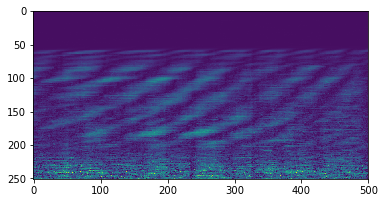

In [64]:
#exp1=np.transpose(exp1)
plt.imshow(exp1)
#plt.plot(exp1[100,:])

In [65]:
for i in range(251):
    #plt.plot(expp1[i]+i*0.1E-9)
    exp1[i] = abs(scipy.fft(exp1[i]))
    #expp2[i] = (scipy.fft(expp1[i])).imag/
    #plt.plot(abs(expp1[i]))


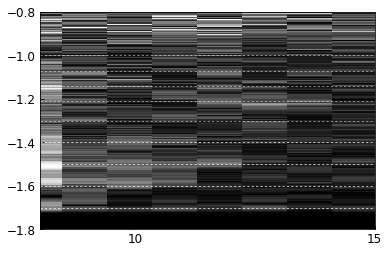

In [71]:
#for i in xrange(100):
#    plt.plot(abs(expp1[i]))
#    plt.ylim(0,0.5E-8)
plt.imshow(exp1,aspect='auto',vmin=0E-9,vmax=10E-9,interpolation='none',cmap='Greys_r',extent=[0,470,-0.8,-2])
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=True,left=True, right=False)
xt=np.linspace(0, 16, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),5),fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-1.8,-0.8)
plt.xlim(8,15)
plt.axhline(y=-1.7, color='w', linestyle='dotted',lw=0.7)
plt.axhline(y=-1.6, color='w', linestyle='dotted',lw=0.7)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.7)
plt.axhline(y=-1.4, color='w', linestyle='dotted',lw=0.7)
plt.axhline(y=-1.3, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='w', linestyle='dotted',lw=0.5)
plt.savefig('D:\\FFT.png',bbox_inches='tight', format='png',dpi=900)

In [ ]:

#for j in xrange (201):
#    for i in xrange(580):
#        if i<290 :
#            expp1[j,i]=expp1[j,290+i]
#        else :
#            expp1[j,i]=expp1[j,580-i]
#expp1=np.transpose(expp1)

In [ ]:
#print x.shape
#print x2.shape
x=np.linspace(-2, -0.8, num=201)
x2=np.linspace(-1, 1, num=580)
#print exp1[20].shape
expp1=np.transpose(expp1)

In [ ]:
expp1.shape

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
gs.update(left=0, right=0.7, wspace=0.2, hspace=0.2)
#ax1 = plt.subplot(gs[0:2, 0:2])
#p=plt.imshow(expp1,interpolation='none',vmax=3E-8, aspect='auto',
#             extent=[-1,1,-0.8,-1.76] )
#plt.colorbar()
#plt.ylabel("$V_{QPC}$ (V)")
#plt.xlabel("$1/V_L$ (a.u.)")
#plt.ylim(-0.8,-1.8)
#plt.xlim(-1,-0.95)
#plt.contour(bf1,20,  extent=[-59,20,-20,20] )
#plt.xlabel("Frequency (1/mV)")
#plt.ylabel("B (T)")
#plt.savefig('/home/sergey/Documents/Bfield.pdf', format='pdf')
#plt.savefig('D:\\1.pdf', format='pdf')
ax2 = plt.subplot(gs[2,0:2])


plt.plot(x2,expp1[40]*1E9, '-k')
plt.xlim(-1,-0.95)
plt.ylim(0,50)
#plt.xticks(np.arange(xt.min(), xt.max(),0.200))

plt.xlabel("$V_{QPC}$ (V)")
plt.ylabel("$I$ (nA)")
#plt.xlim(0,550)
yt=np.linspace(0, 0.14, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.05))
ax3 = plt.subplot(gs[0:2:, 2])
#dat=baseline_als(exp1[272],10,0.01,100)
#plt.plot(30*exp4[1],exp4[0],'b')
plt.plot(exp4[2]*1000000,exp4[0],'r')
plt.plot((np.transpose(expp1))[9]*1E9,x, '-k')
plt.ylim(-0.8,-2)
plt.ylabel("Fourier amplitude (a.u.)")
plt.xlabel("$V_{QPC}$ (V)")


#plt.savefig('D:\\1.pdf', format='pdf')

In [ ]:
np.transpose(expp1)[298]

In [ ]:
plt.plot(x,(np.transpose(expp1))[9]*1E9, '-k')
np.savetxt('D:\\amp', (np.transpose(expp1))[9]*1E9, delimiter=' ') 

In [ ]:
exp1=np.transpose(exp1)
#dat=baseline_als(exp1[272],10,0.01,100)
plt.plot(x,exp1[250])
x=np.linspace(-2, -1.039, num=201)
plt.xlim(-2,-1.2)
plt.ylabel("Fourier amplitude (a.u.)")
plt.xlabel("$V_{QPC}$ (V)")
#plt.savefig('D:\\2.pdf', format='pdf')
#plt.plot(dat)

In [ ]:
for i in xrange(201):
    dat=baseline_als(exp2[i],10000,0.0001,100)
    exp2[i]=exp2[i]-dat

In [ ]:
plt.imshow(exp2, interpolation='none', aspect='auto',vmax=3E-9,cmap='hot')

In [ ]:
exp1 = np.fromfile("D:\phase.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (241,10))
exp2 = exp1.transpose()
for i in range(0,3):
    plt.plot(exp2[0],exp2[3*i+2],'ro-',markersize=4)
    plt.plot(exp2[0],exp2[3*i+3],'ko-',markersize=4)
    plt.plot(exp2[0],exp2[3*i+1],'bo-',markersize=4)
plt.savefig('D:\\sl0.pdf', format='pdf')
plt.ylim(1E-9,2.1E-9)
plt.xlim(-2,-1.2)